In [2]:
# chap5
    

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib inline

#問題

選挙資金は選挙に影響を与えるか
実際の選挙の結果を分析して、正しかったかを検証する

```
赤:共和党
青:民主党
緑:シングルイシュー
紫:　業界団体
黄色： NPO
PAC(政治活動委員会)
PAC-A
PAC-B
が同じ候補署に献金した場合、リンクされる
RNC: 共和党員会
DNC: 民主党員会
```






## 2モードネットワーク理論

2モードネットワーク：ノードには2つの種類があり、2つのノードの関係はリンクによって決まる


A,B,Cが複数の組織に所属しているのならば、
共通のグループを形成しているのではないかと疑える。
関係を集めていくと、推測されるつながりの重さを量ることができる。

アイランド法、クラスタ分析による分析に向いている。
理由は、ネットワークが本質的に類似性や相関関係のネットワークである

## 属性ネットワーク
2モードネットワーク分析の一つの方法は同類成概念を基礎としている
つまり、関心や性質を共有する人々は大きく異なる人々よりも互いに話が合い、
結びつきを作るだろうという考え方である。

知り合いかもメカニズムを作りたい場合は、属性や関心を2モードネットワークとして扱うと役に立つ。一つ一つの情報、タグ、キワードなどを2モードネットワークのノードとして扱う。そこから人の所属ネットワークを計算し、アイランド法や、クラスタ分析を適用して、グループになっていても良さそうな人々を探し出せば良い。


In [13]:
x = np.array([
    [0,0,0,0,1],
    [1,0,0,0,0],
    [1,1,0,0,0],
    [0,1,1,1,1],
    [0,0,1,0,0],
    [0,0,1,1,0]
])
dfx = pd.DataFrame(x, columns=list(range(1,6)),index='A B C D E F'.split())
dfx

,1,2,3,4,5
A,0,0,0,0,1
B,1,0,0,0,0
C,1,1,0,0,0
D,0,1,1,1,1
E,0,0,1,0,0
F,0,0,1,1,0


In [18]:
dfx.T

,A,B,C,D,E,F
1,0,1,1,0,0,0
2,0,0,1,1,0,0
3,0,0,0,1,1,1
4,0,0,0,1,0,1
5,1,0,0,1,0,0


共通している部分の数を数える
つまり, $x\times x^t$

In [20]:
dfx.dot(dfx.T)

,A,B,C,D,E,F
A,1,0,0,1,0,0
B,0,1,1,0,0,0
C,0,1,2,1,0,0
D,1,0,1,4,1,2
E,0,0,0,1,1,1
F,0,0,0,2,1,2


# 実際の2モードネットワーク

In [21]:
import csv
import math
from networkx.algorithms import bipartite as bi


In [29]:
pdc = pd.read_csv(open('campaign_short.csv'))
#pdc.columns ='献金者ID 税ID 組織種別 月 日 世紀 年 額'.split()
pdc

,C00000042,N,MY,P,99034551644,24K,2,8,19,99,0001000,C00319285,S4MO00037,175211
0,C00000042,N,MY,P,99034551644,24K,5,20,19,99,1250,C00208090,H6IL14095,175212
1,C00000042,N,MY,P,99034551644,24K,5,20,19,99,1000,C00013573,H6IL06026,175213
2,C00000042,N,MY,P,99034551644,24K,5,20,19,99,1000,C00079020,H8IL10016,175214
3,C00000042,N,Q1,G,20035433084,24K,3,28,20,0,2500,C00350785,H0IL10120,946633
4,C00000042,N,Q1,P,20035433084,24K,2,15,20,0,1000,C00350785,H0IL10120,946634
5,C00000042,N,Q1,G,20035433084,24K,3,28,20,0,1000,C00346759,H8CT05104,946635
6,C00000042,N,Q1,P,20035433084,24K,3,13,20,0,500,C00257121,H2IL01042,946636
7,C00000042,N,Q1,P,20035433084,24K,2,17,20,0,500,C00350496,H0IL15061,946637
8,C00000042,N,Q2,G,20035834069,24K,6,5,20,0,1000,C00303354,S4MI00165,1258632
9,C00000042,N,Q2,G,20035834069,24K,6,5,20,0,2000,C00309930,H6IL17106,1258633


In [30]:
g = nx.Graph()

In [71]:
pacs = []
candidates = []
r = csv.reader(open('campaign_short.csv', 'rU'))

for row in r:
    if row[0] not in pacs:
        pacs.append(row[0])
    if row[12] not in candidates:
        candidates.append(row[12])
    g.add_edge(row[0], row[12], weight=int(row[10]))
    

In [72]:
pacs

['C00000042',
 'C00000059',
 'C00000125',
 'C00000372',
 'C00000422',
 'C00000489',
 'C00000547',
 'C00000638',
 'C00000729']

In [73]:
candidates

['S4MO00037',
 'H6IL14095',
 'H6IL06026',
 'H8IL10016',
 'H0IL10120',
 'H8CT05104',
 'H2IL01042',
 'H0IL15061',
 'S4MI00165',
 'H6IL17106',
 'H2WI05150',
 'H0OH08029',
 'H8WI00026',
 'H4PA13066',
 'H0MD08021',
 'H6KY03090',
 'H0MT00033',
 'H8NY27077',
 'H8WI09050',
 'H2SC05052',
 'H8IL13069',
 'S8RI00102',
 'H0ND00101',
 'H4MD02059',
 'H8NJ06118',
 'S0WA00019',
 'H0NY01095',
 'H4MN01070',
 'H8KY00035',
 'S8FL00075',
 'H0IA02040',
 'H8WI01024',
 'H0VA02035',
 'H2IL20042',
 'P00003335',
 'S8MO00129',
 'S4MN00213',
 'S0NY00170',
 'S4PA00063',
 'S8VA00214',
 'H6MO03119',
 'H4MO05069',
 'H6CA10088',
 'H6MO07128',
 'H2CT06014',
 'H0FL18025',
 'H2IN06023',
 'H2MD05155',
 'H4OH19036',
 'H4VA11020',
 'S0NY00303',
 'H8KS03049',
 'H0KS03061',
 'S8MT00119',
 'H6MO04141',
 'H6MO08084',
 'H6KS01096',
 'H6KS02227',
 'H8CA03014',
 'H8CA40057',
 'H2MN06073',
 'H6NH01131',
 'H6MI16034',
 'H4MO09046',
 'H8NJ13049',
 'H2NY14037',
 'H6NY19029',
 'H2OH04032',
 'H8PA15096',
 'H2WA08075',
 'H8CA18020',
 'S6NE

In [83]:
pacnet = bi.weighted_projected_graph(g, pacs, ratio=False)

In [99]:
pacnet = list(nx.connected_component_subgraphs(pacnet))[1]

In [100]:
pacnet.remove_node('C00000125')

In [108]:
weights = [math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]

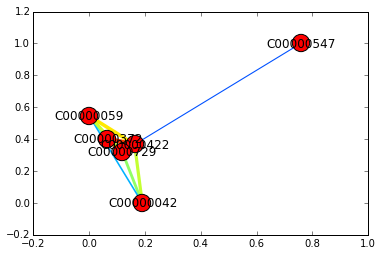

In [116]:
pos = nx.spring_layout(pacnet)
nx.draw_networkx(pacnet,width=weights, edge_color=weights)

In [117]:
pacnet.remove_node('C00000547')

In [118]:
weights = [math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]

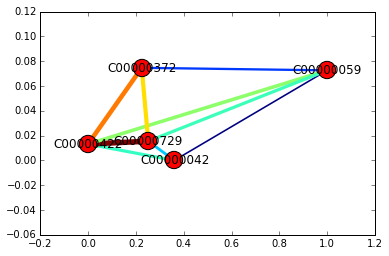

In [119]:
nx.draw_networkx(pacnet,width=weights, edge_color=weights)

In [120]:
connect = bi.weighted_projected_graph(g, candidates, ratio=False)

In [121]:
compo = list(nx.connected_component_subgraphs(connect))
cannet = compo[np.argmax([len(gp) for gp in compo])]

In [124]:
weights= [math.log(edata['weight']) for f,t,edata in cannet.edges(data=True)]

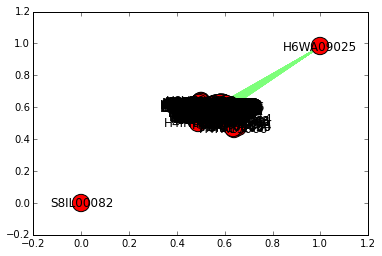

In [125]:
nx.draw_networkx(cannet, width=weights, edge_color=weights)

In [130]:
compo2 = list(nx.connected_component_subgraphs(compo[0]))

In [136]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2


(array([  7.89610000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.71980000e+04,
          0.00000000e+00,   1.87100000e+03,   0.00000000e+00,
          1.30000000e+01]),
 array([ 0.        ,  0.13862944,  0.27725887,  0.41588831,  0.55451774,
         0.69314718,  0.83177662,  0.97040605,  1.10903549,  1.24766493,
         1.38629436]),
 <a list of 10 Patch objects>)

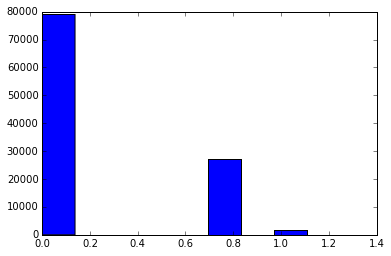

In [134]:
plt.hist(weights)

In [137]:
cannet = trim_edges(cannet, weight=math.exp(0.9))

In [139]:
len(cannet)

89

In [140]:
weights = [edata['weight'] for f,t, edata in cannet.edges(data=True)]

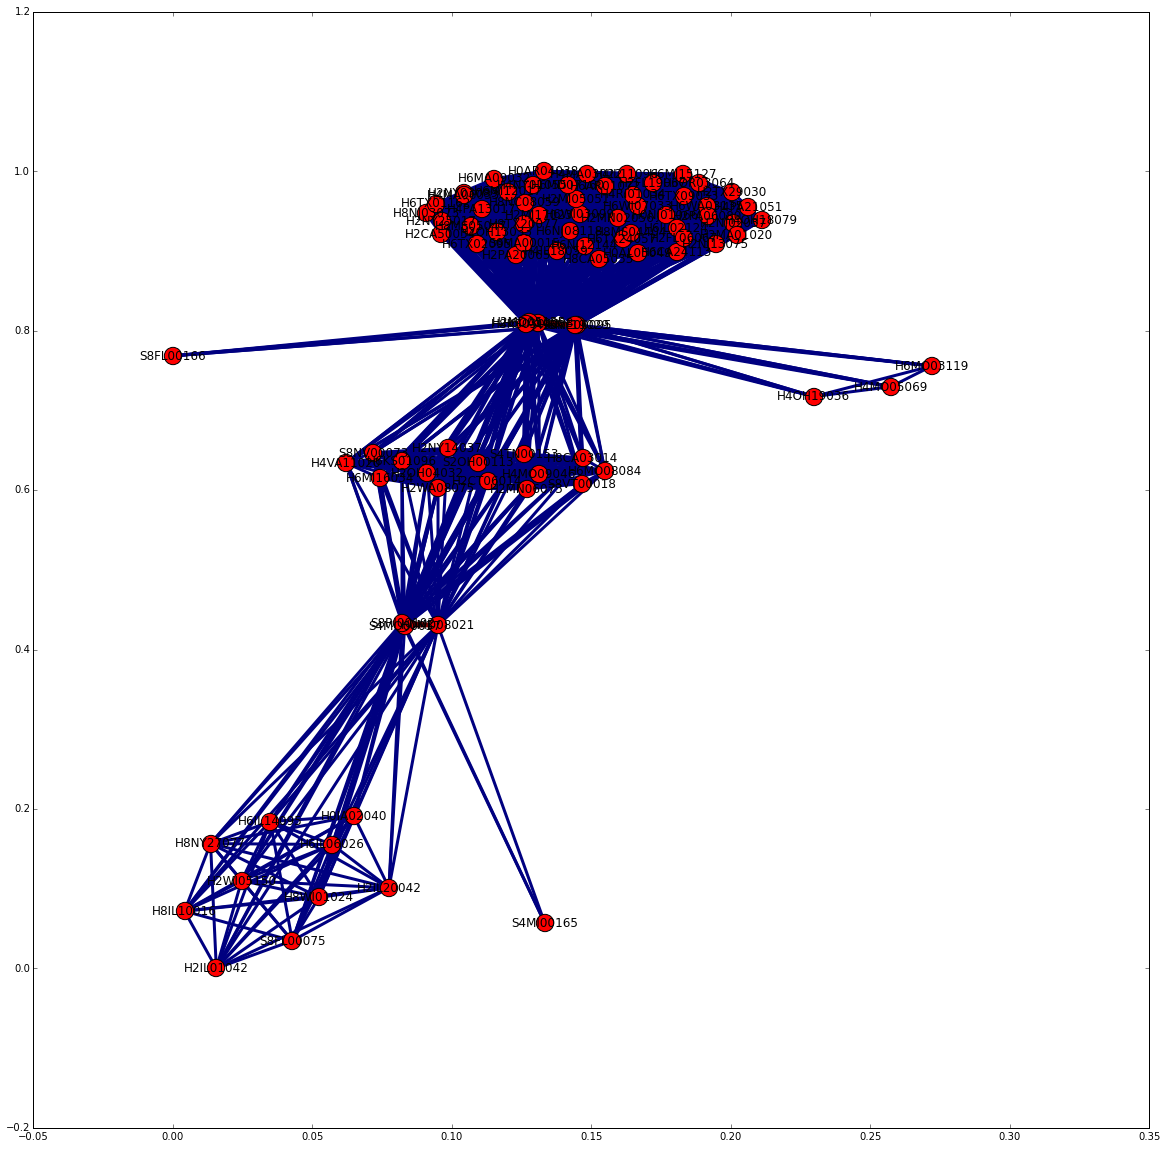

In [144]:
plt.figure(figsize=(20,20))
nx.draw_networkx(cannet, width=weights, edge_color=weights)

In [145]:
pc = nx.adj_matrix(g)
cp = pc.T
cc = pc.dot(cp)

In [149]:
cc_graph = nx.Graph(cc)

In [153]:
cc_compo = list(nx.connected_component_subgraphs(cc_graph))
[len(c) for c in cc_compo]

[525, 7, 1, 1, 1, 1]

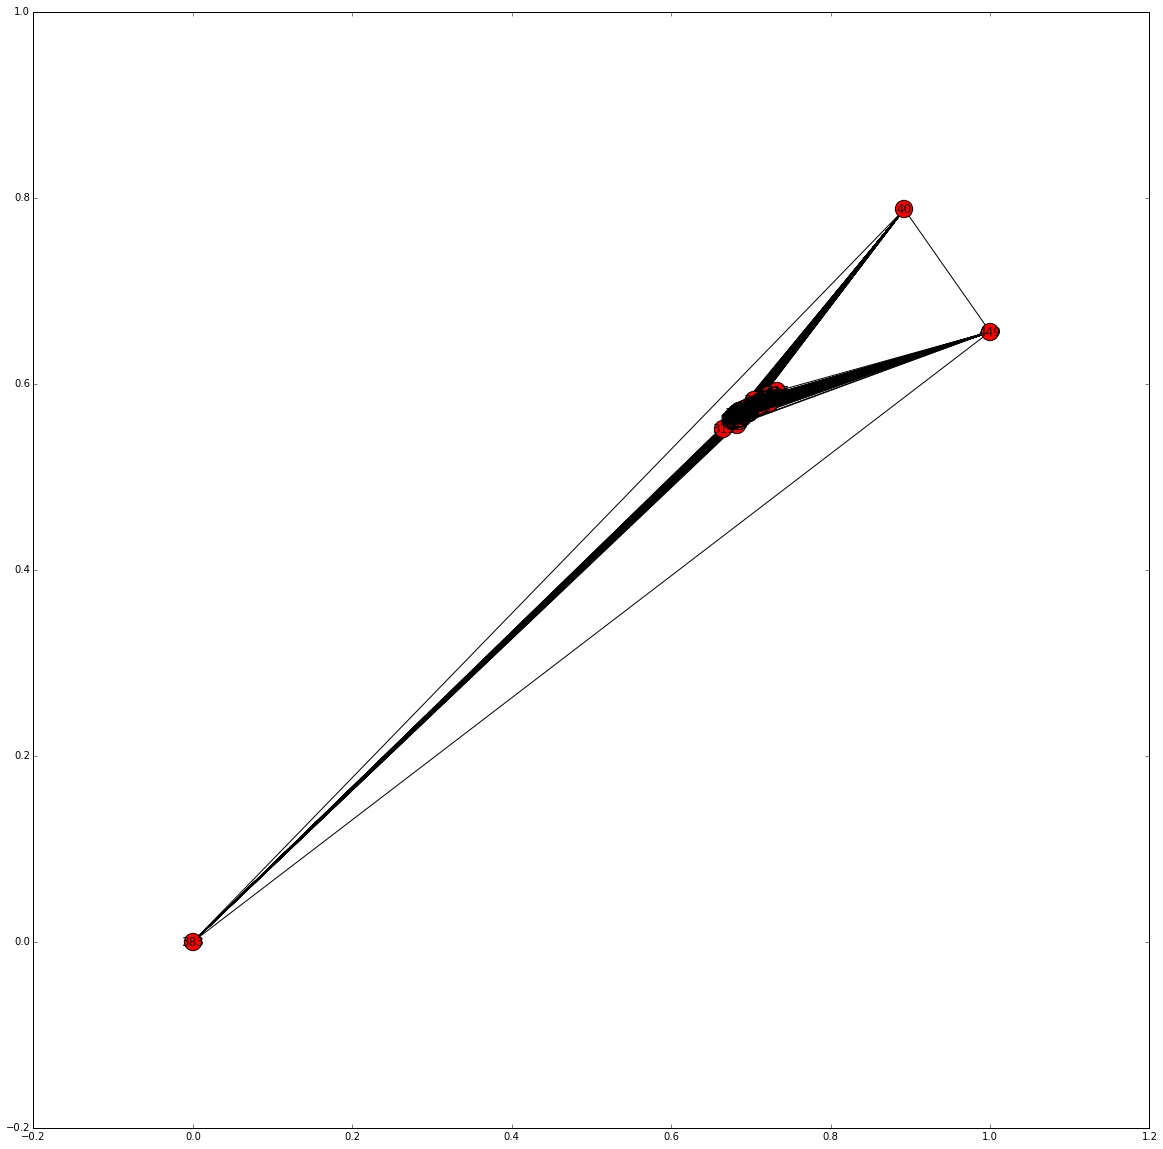

In [154]:
plt.figure(figsize=(20,20))
nx.draw_networkx(cc_compo[0])

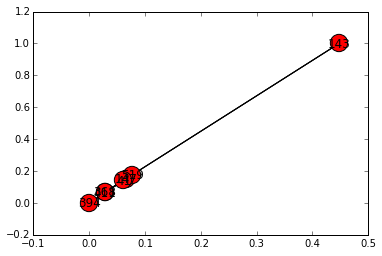

In [155]:
nx.draw_networkx(cc_compo[1])